<h1 style="text-align: center;">Bike Sharing</h1>
<h3 style="text-align: center;">Elia Samuel</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, 
from membership, rental, and return back, has become automatic. Through these systems, a user 
can easily rent a bike from a particular position and return back at another position. Currently, 
there are about over 500 bike-sharing programs around the world which is composed of over 500 
thousand bicycles. Today, great interest exists in these systems due to their important role in 
traffic, environmental, and health issues.

Apart from interesting real-world applications of bike-sharing systems, the characteristics of data 
generated by these systems make them attractive for research. Unlike other transport services 
such as buses or subways, the duration of travel, departure, and arrival position is explicitly 
recorded in these systems. This feature turns the bike-sharing system into a virtual sensor 
network that can be used for sensing mobility in the city. Hence, it is expected that the most 
important events in the city could be detected by monitoring these data. 

**1.2 Problem Statements**

One of the biggest challenges for bike-sharing companies is ensuring the optimal availability of bikes at each station to meet customer demand efficiently. The demand for bike rentals fluctuates significantly due to factors such as time, weather conditions, and urban mobility patterns.  

Given that bike-sharing systems must ensure bikes are available at the right locations and times, it is essential to have a reliable demand forecasting system.  

**With the growing number of customers and an expanding network of bike stations, predicting the number of bike rentals at any given time is crucial.** This prediction can help the company optimize bike distribution, reduce operational costs, and _improve customer satisfaction_ by ensuring the availability of bikes when and where they are needed.

**1.3 Goals**

Based on the stated problem, a bike-sharing company requires a tool that can **accurately predict the number of bike rentals at specific times and conditions**. This predictive tool should leverage various features, such as time (hour, day, season), weather conditions (temperature, humidity, weather situation), and holiday schedules, to enhance the accuracy of rental demand forecasts. By doing so, the company can ensure an efficient allocation of bikes to meet customer needs.

For the company, a reliable demand prediction tool would not only optimize bike distribution and reduce operational costs but also significantly improve customer satisfaction. By ensuring that bikes are always available when and where they are needed, the company can enhance customer loyalty, increase rental volumes, and, consequently, boost overall revenue.

**1.4 Analytical Approach**

To develop an effective regression model for predicting bicycle rental demand based on historical data, a structured analytical approach is employed. First, the dataset is preprocessed to handle missing values, outliers, and categorical variables, ensuring data quality and consistency. Feature engineering is then applied to extract meaningful attributes such as temporal features (e.g., hour, day, month), weather conditions, and holiday indicators to capture factors influencing rental behavior. Advanced transformation techniques, including cyclical encoding for time-related variables, are utilized to maintain the continuity of periodic data. Following this, the dataset is split into training and testing sets, and a pipeline is constructed to streamline preprocessing and modeling. Various regression algorithms, such as XGBoost, are evaluated using hyperparameter tuning and cross-validation to identify the best-performing model. Key performance metrics, including RMSE, MAE, MAPE, and 𝑅2, are used to assess model accuracy, while SHAP (SHapley Additive exPlanations) values provide insights into feature importance, enabling a comprehensive understanding of the predictors driving rental demand.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

The evaluation metrics to be used are **RMSE**, **MAE**, **MAPE**, and **R-squared**, with detailed descriptions as follows:  

1. **Root Mean Squared Error (RMSE)**  
   - **Definition**: RMSE represents the square root of the mean of the squared errors between the actual and predicted values.  
   - **Purpose**: RMSE penalizes larger errors more heavily, making it particularly useful when minimizing significant deviations is a priority.  
   - **Interpretation**: A lower RMSE indicates that the model has a better predictive accuracy.  

2. **Mean Absolute Error (MAE)**  
   - **Definition**: MAE measures the average magnitude of errors in predictions, taking the absolute difference between actual and predicted values.  
   - **Purpose**: MAE provides a straightforward measure of prediction accuracy without over-penalizing outliers.  
   - **Interpretation**: A lower MAE signifies that the model predictions are closer to the actual values.  

3. **Mean Absolute Percentage Error (MAPE)**  
   - **Definition**: MAPE calculates the average percentage difference between actual and predicted values.  
   - **Purpose**: MAPE is useful for interpreting errors in terms of percentage, making it easy to communicate results to stakeholders.  
   - **Interpretation**: A lower MAPE indicates better model performance, especially when evaluating relative prediction errors.  

4. **R-squared (R²)**  
   - **Definition**: R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables.  
   - **Purpose**: R² evaluates how well the model explains the observed data variance.  
   - **Interpretation**: An R² value closer to 1 indicates that the model fits the data well. However, R² is primarily valid for linear regression models and may not be suitable for non-linear models.

**1.6 Success Criteria**

## **Section 2. Data Understanding**

In [81]:
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import shap

from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


from sklearn.model_selection import train_test_split, KFold, cross_validate

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, make_scorer, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Data Science\Capstone Project\Capstone Project 3\bike_sharing\data\raw\data_bike_sharing.csv')

**2.1 General Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


The Bike Sharing dataset, as shown in the information above, comprises 11 columns and 12,165 records. The columns are of the following data types:

- 1 Object Data Type: `dteday`
- 7 Integer Data Types: `weathersit`, `holiday`, `season`, `hr`, `casual`, `registered`, `cnt`
- 3 Float Data Types: `temp`, `atemp`, `hum`

**2.2 Feature Information**

| Feature | Description | Impact to Business |
|---------| ----------- | ------------------ |
| dteday | date | Helps track rental trends over time |
| season | season (1: winter, 2: spring, 3: summer, 4: fall)  | Seasonal demand variations |
| hr | hour (0 to 23) | Key to understanding peak rental hours |
| holiday | holiday or not  | Captures impact of holidays on rentals |
| temp |  normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8,t_max+39 (only in hourly scale)  | Weather influence on rentals |
| atemp | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin),tmin=-16, t_max=+50 (only in hourly scale)  | Comfort level impact on user behavior |
| hum | normalized humidity. The values are divided into 100 (max)  | Weather conditions affecting rentals |
| casual |  count of casual users | Insights into non-registered user behavior |
| registered | count of registered users | Insights into loyal customer base |
| cnt | count of total rental bikes including both casual and registered  | Overall rental business performance |
| weathersit | 1: [Clear, Few clouds, Partly cloudy, Partly cloudy], 2: [Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist], 3: [Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds], 4: [Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog]| Direct weather impact on demand |

**2.3 Statistics Summary**

In [4]:
display(df.describe(), df.describe(include='object'))

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,2012-03-02
freq,22


Based on descriptive statistics, there is an anomaly in the `hum` column where the value is 0, which is illogical and will be removed.

## **Section 3. Data Cleaning**

To provide more granular information for model training, we can introduce new columns by extracting the **day**, **month**, **year**, and **date** components from the existing `dteday` string column.

In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])

df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['date'] = df['dteday'].dt.day

df['day'] = df['dteday'].dt.weekday
df['is_weekend'] = df['day'].isin([5,6]).astype(int)

In [6]:
df = df.drop(['dteday'], axis=1)

**3.1 Missing Values**

In [7]:
print('Total Missing values:', df.isnull().sum().sum())

Total Missing values: 0


**3.2 Duplicated Values**

In [8]:
print('Total Duplicate rows:', df.duplicated().sum())

Total Duplicate rows: 0


In [9]:
df = df.drop_duplicates()

**3.3 Identify Spelling Errors**

To improve data clarity and facilitate analysis, we need to rename the following columns:
- hum : humidity
- weathersit : weather
- hr : hour
- cnt : count
- atemp : feeling_temp 

In [10]:
df = df.rename({'hum':'humidity','weathersit':'weather','hr':'hour','cnt':'count', 'atemp':'feeling_temp'}, axis=1)

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)

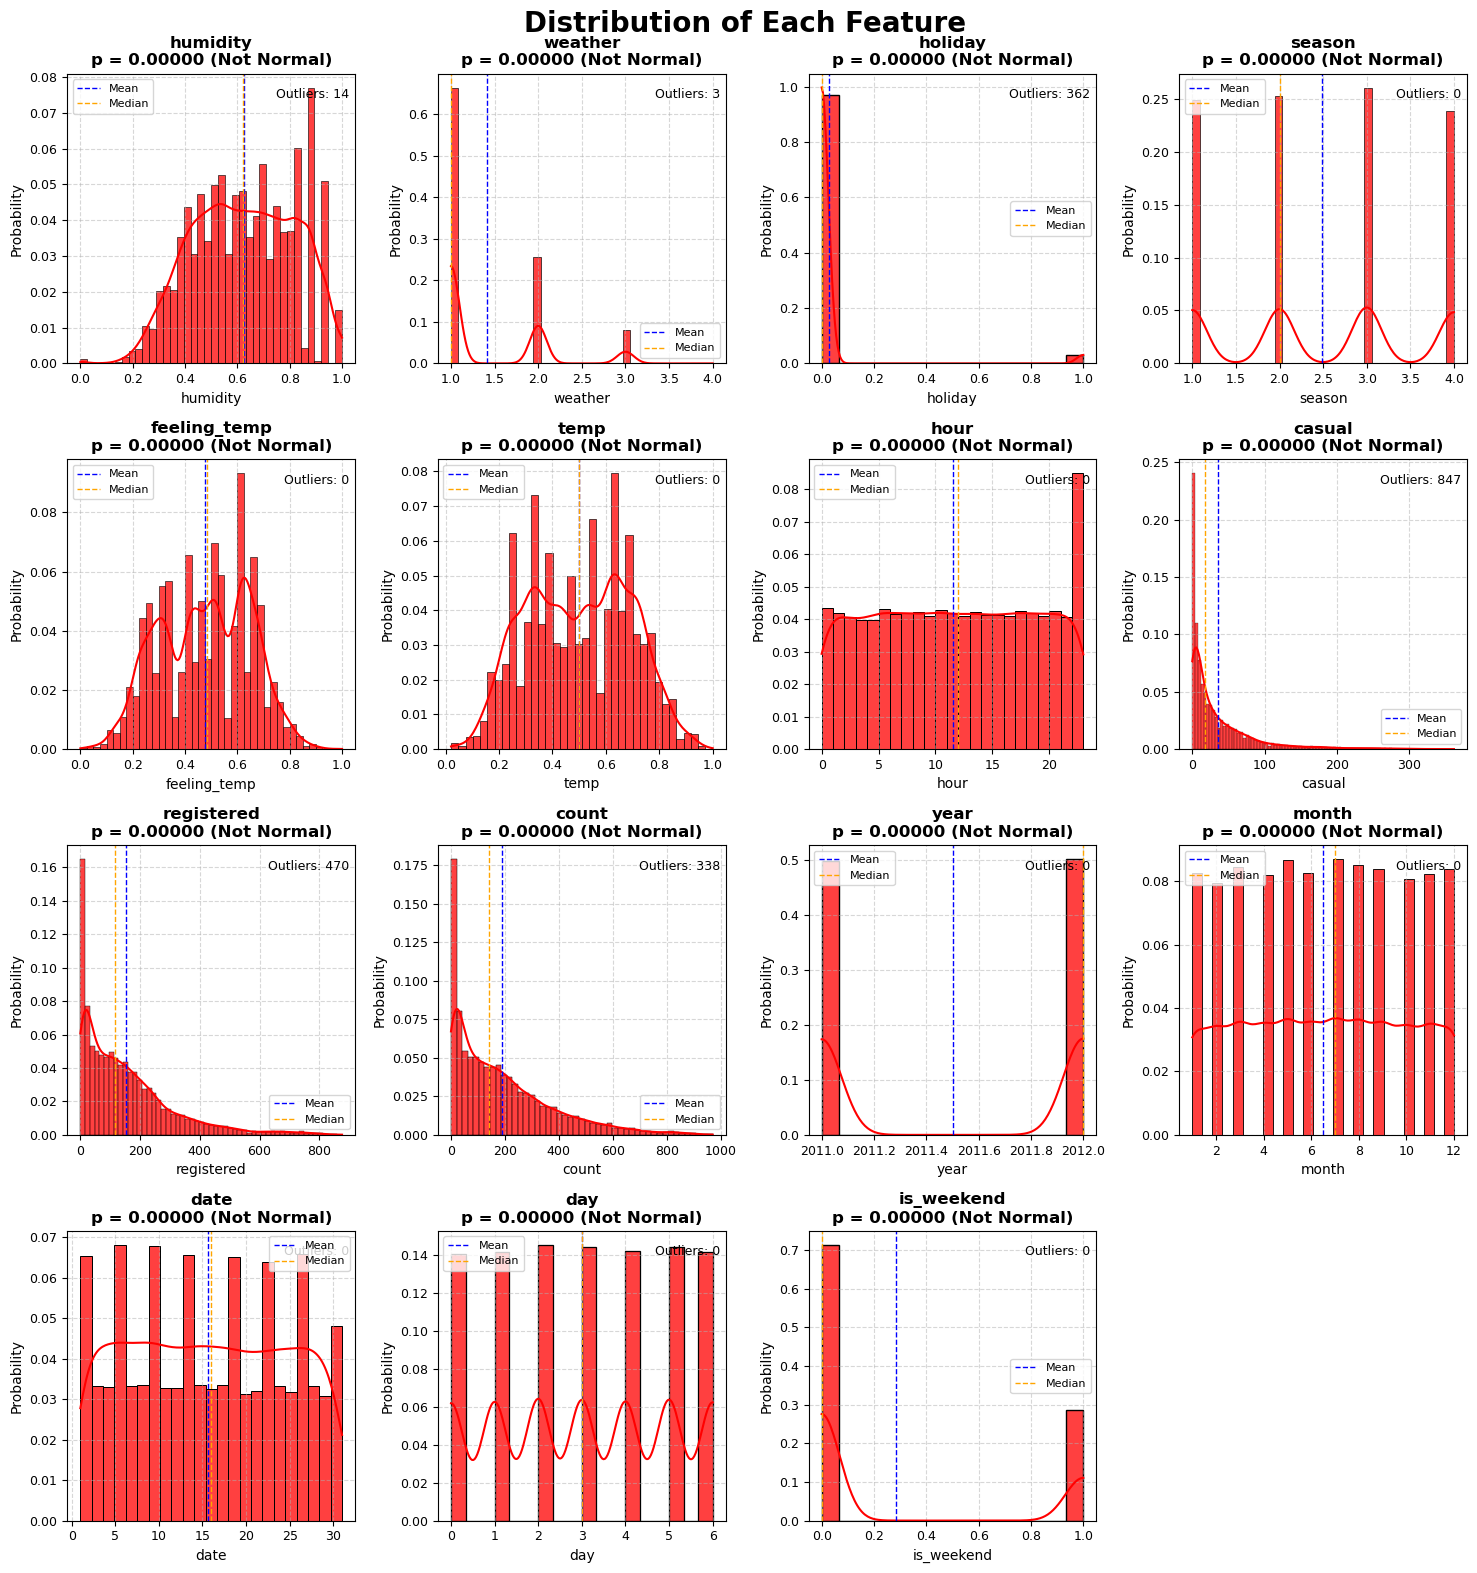

In [11]:
# Select numerical features
num_features = df.select_dtypes(include='number')

# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = int(np.ceil(len(num_features.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
fig.suptitle('Distribution of Each Feature', fontsize=20, weight='bold')

# Loop through columns and plot
for ax, col in zip(axes, num_features.columns):
    # Perform the normality test
    stat, pvalue = normaltest(num_features[col].dropna())
    
    # Determine distribution description
    if pvalue > 0.05:
        distribution = f"p = {pvalue:.5f} (Normal)"
    else:
        distribution = f"p = {pvalue:.5f} (Not Normal)"
    
    color = 'green' if pvalue > 0.05 else 'red'

    # Calculate outliers using IQR
    q1 = num_features[col].quantile(0.25)
    q3 = num_features[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((num_features[col] < (q1 - 1.5 * iqr)) | (num_features[col] > (q3 + 1.5 * iqr))).sum()

    # Plot histogram with KDE
    sns.histplot(data=num_features[col], ax=ax, kde=True, color=color, stat='probability', alpha=0.75)

    # Add vertical lines for mean and median
    mean = num_features[col].mean()
    median = num_features[col].median()
    ax.axvline(mean, color='blue', linestyle='--', linewidth=1, label='Mean')
    ax.axvline(median, color='orange', linestyle='--', linewidth=1, label='Median')
    ax.legend(fontsize=8)

    # Set title with distribution information
    ax.set_title(f"{col}\n{distribution}", fontsize=12, weight='bold')
    
    # Annotate outliers
    ax.text(0.98, 0.95, f'Outliers: {outliers}', fontsize=9, ha='right', va='top', transform=ax.transAxes)

    # Customize grid and ticks
    ax.grid(visible=True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=9)

# Remove unused axes
for ax in axes[len(num_features.columns):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()


To assess the distribution of data in each column, the D'Agostino-Pearson normality test was conducted. Additionally, the interquartile range (IQR) was used to identify outliers. The results of the normality test indicated that the data was not normally distributed (p = 0.00000). Several columns, including `weather`, `holiday`, and `season`, were suitable for categorical conversion. Columns such as `casual`, `registered`, and `count` exhibited positive skewness and contained outliers

## **Section 4. Data Generation**

### **4.1 Constructing *Seen* and *Unseen* Data**

**Seen Data (80%)**

Seen data represents the information that a machine learning model has been exposed to during its development process. This data serves as the building blocks for the model's understanding of the world it's trying to navigate. We can further divide seen data into two categories:

- Training Data (80%):
Training data is a subset of data that has been observed and used specifically to train machine learning models. Through the learning process, the model will identify patterns and relationships between various variables, such as weather, day of the week, and location, to predict the number of rental bike users.
- Test Data (20%): 
Test Data is a subset of data that has been observed but not used in the training process. The test data serves as a benchmark for the performance of the trained model. By comparing the model predictions with the actual values in the test data, we can measure the accuracy of the model and avoid overfitting.

**Unseen Data (20%)**

The "unseen" dataset comprises the remaining 20% of the original data, held back for testing and evaluating the model's performance on new, unseen examples.

- Production Data: 
Production data is new data that has never been used in the model development process. It represents the real-world conditions that the model will face once implemented. By using production data, we can evaluate the model's performance in predicting the number of rental bike users in situations that have never been encountered before and make more informed business decisions.

In [12]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

print('Seen Data shape:', df_seen.shape)
print('Unseen Data shape:', df_unseen.shape)

Seen Data shape: (9732, 15)
Unseen Data shape: (2433, 15)


### **4.2 Constructing Training and Testing Data (from Seen Dataset)**

In [13]:
df_train, df_test = train_test_split(df_seen, test_size=0.2, random_state=42)

print('Training Data shape:', df_train.shape)
print('Test Data shape:', df_test.shape)

Training Data shape: (7785, 15)
Test Data shape: (1947, 15)


## **Section 5. Exploratory Data Analysis (EDA)**

In [14]:
df_Eda = df_seen.copy()

In [15]:
cat_features = df_Eda[['weather', 'holiday', 'season', 'year', 'is_weekend','date','day','hour', 'month']] 
num_features = df_Eda.loc[:, ~df_Eda.columns.isin(cat_features.columns.to_list())]

print(f'Categorical feature : {cat_features.columns.to_list()}')  
print(f'Numerical feature : {num_features.columns.to_list()}')

Categorical feature : ['weather', 'holiday', 'season', 'year', 'is_weekend', 'date', 'day', 'hour', 'month']
Numerical feature : ['humidity', 'feeling_temp', 'temp', 'casual', 'registered', 'count']


### **5.1 Categorical data analysis on the dependent variable `count`**

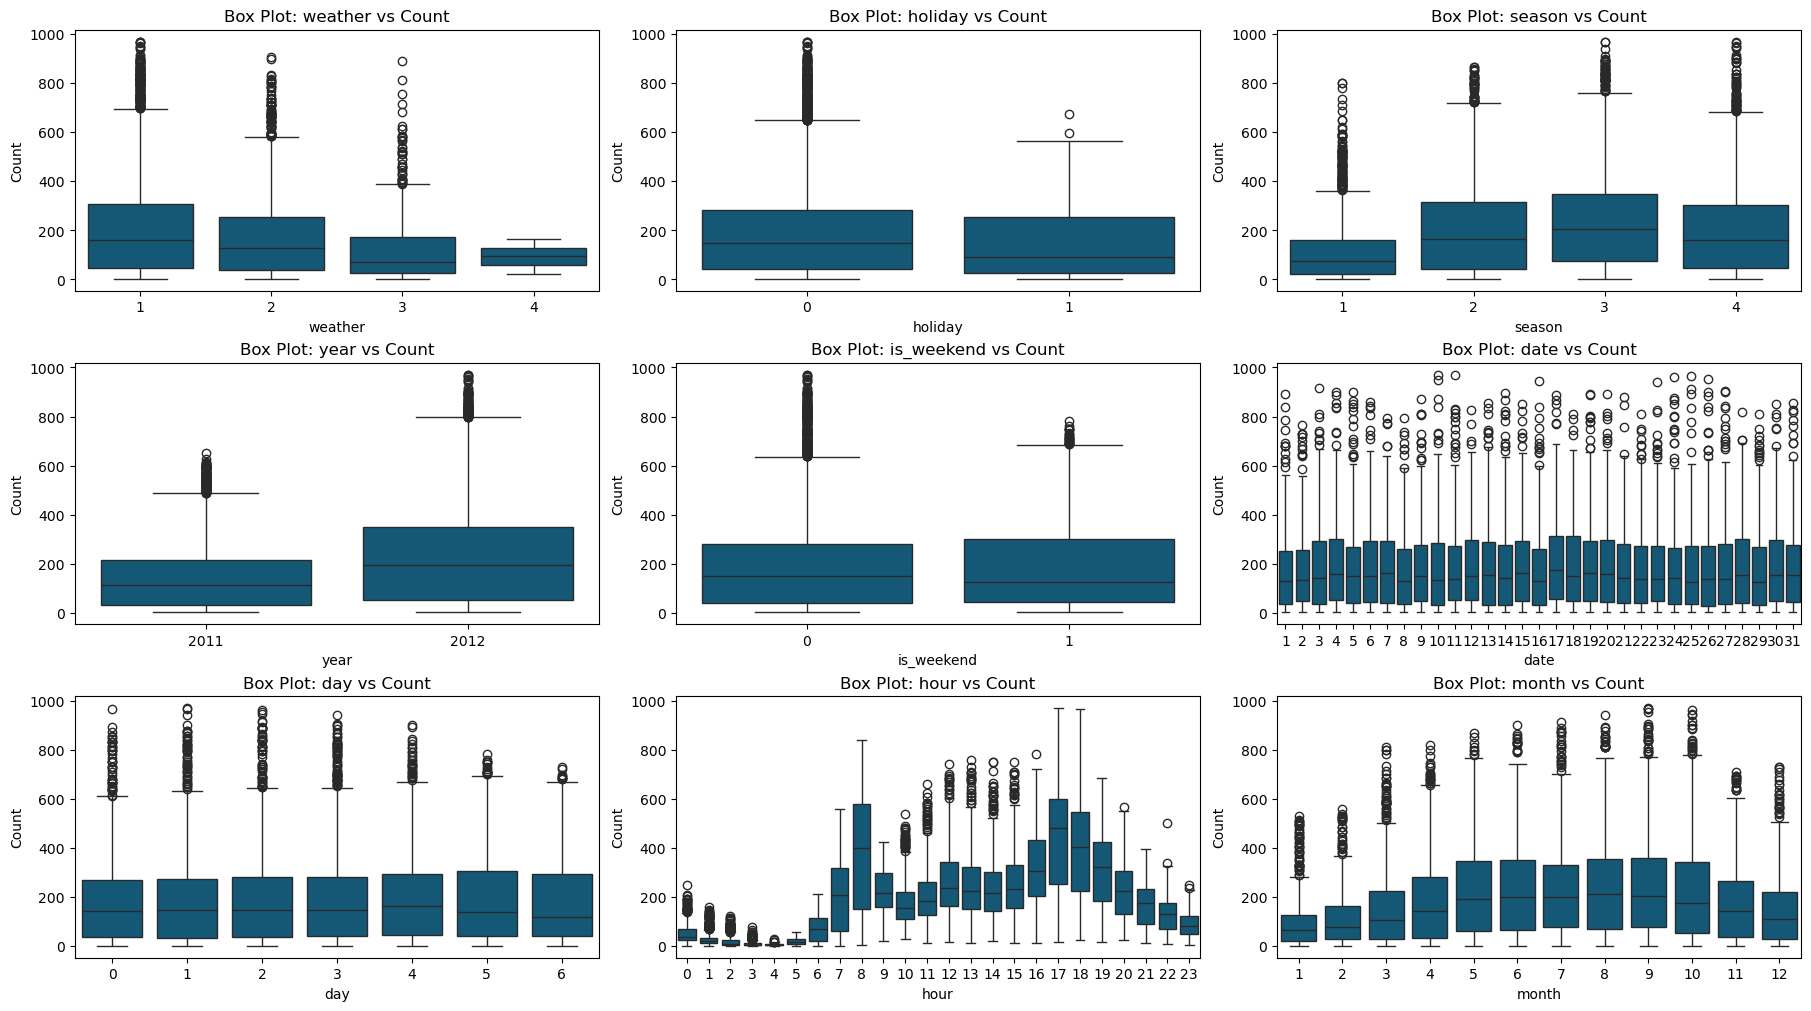

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(cat_features.columns):
    sns.boxplot(data=df_seen, x=feature, y='count', color='#055E85', ax=axes[i])
    axes[i].set_title(f'Box Plot: {feature} vs Count')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Sembunyikan subplot kosong jika jumlah fitur kurang dari 6
for j in range(len(cat_features.columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

Based on the boxplot visualization, the following insights are obtained:
- `Weather`: 
Category '1' consistently exhibited higher median and upper quartile values compared to other categories, indicating a significantly larger count of rentals under such weather conditions. Conversely, weather category '4' displayed a lower distribution.

- `Holiday`: 
No significant differences were observed in the interquartile range and median between holidays and non-holidays, suggesting that holiday periods do not have a substantial impact on the count of rentals.

- `Season`: 
Seasons "2" and "3" showed higher median and interquartile range values compared to other seasons, indicating a seasonal influence on rental counts.

- `Date`: 
Although a few significant outliers were observed, the overall distribution of rental counts was fairly consistent throughout the observation period.

- `Month`: 
Months of July and August exhibited higher distributions compared to other months, indicating a strong seasonal effect on rental counts.

- `Year`: 
A clear upward trend in rental counts was observed from 2011 to 2012, as indicated by increasing median and upper quartile values.

- `is_Weekend`: 
Weekdays (1) tended to have slightly higher median values compared to weekends (0), although the difference was not statistically significant.

- `Hour`: 
A distinct diurnal pattern was observed, with peak rental counts occurring during the afternoon hours, followed by a significant decline during the night."

### **5.2 Numerical data analysis on the dependent variable `count`**

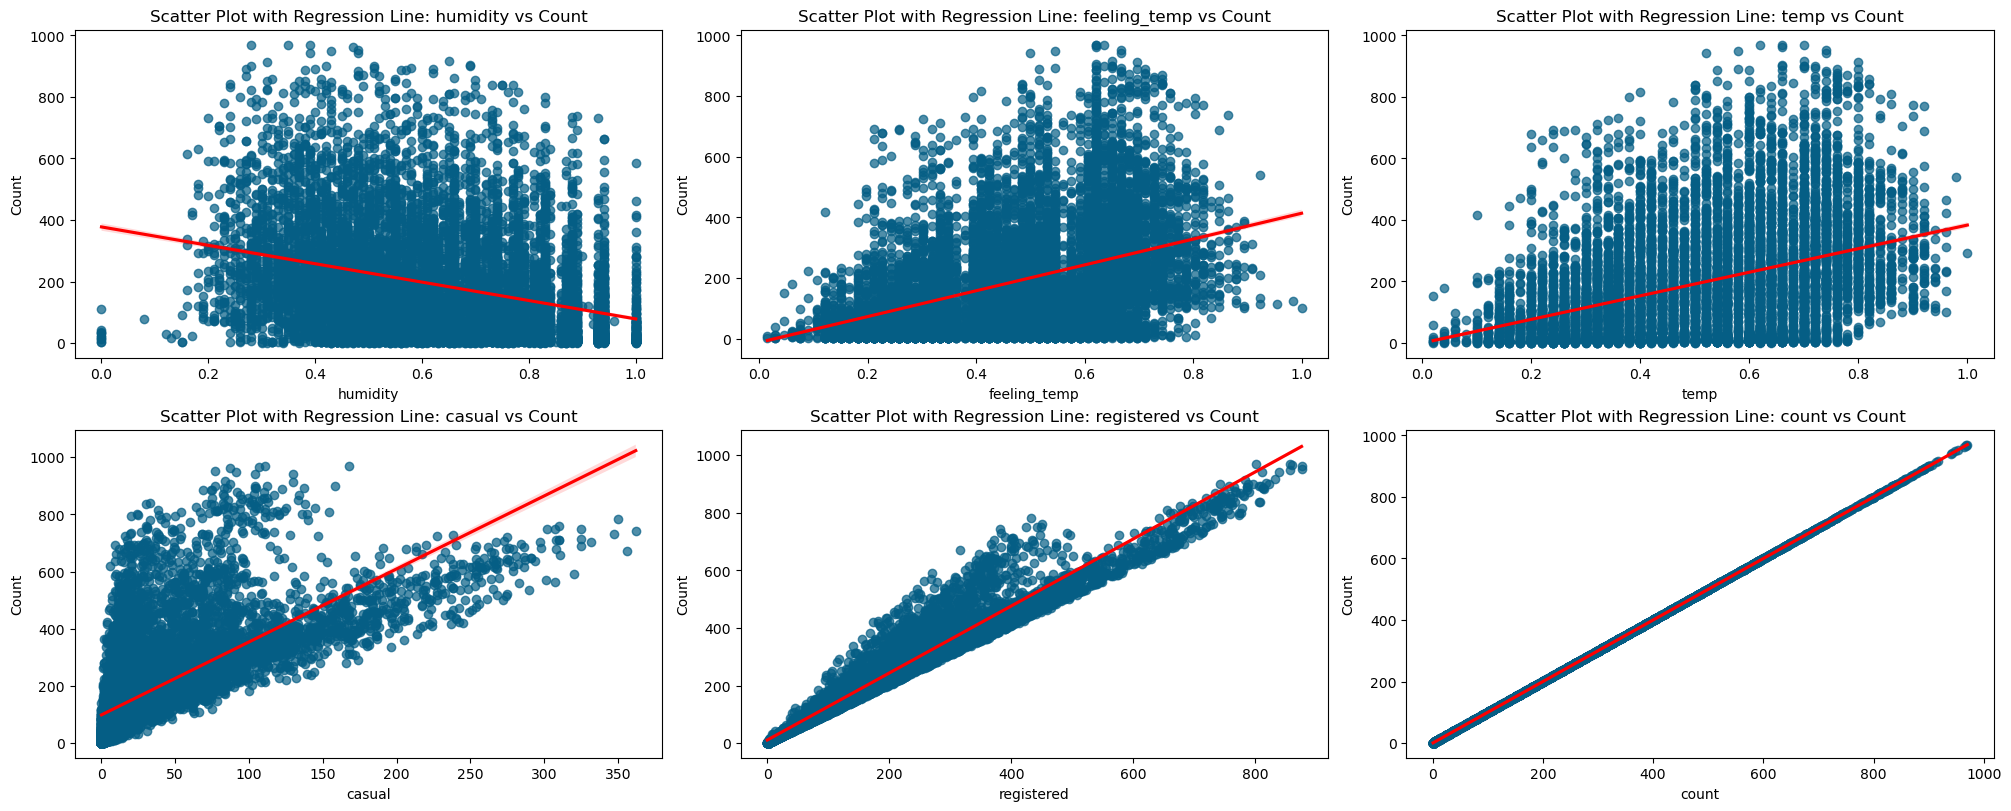

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(20, 8), constrained_layout=True)
axes = axes.flatten()

for ax, feature in zip(axes, num_features.columns):
    sns.regplot(data=df_seen, x=feature, y='count', color='#055E85', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f'Scatter Plot with Regression Line: {feature} vs Count')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Nonaktifkan subplot yang tidak digunakan
for ax in axes[len(num_features.columns):]:
    ax.axis('off')

plt.show()

Based on the scatter plot visualization with regression lines, the following insights are obtained:
- `Temp` (Temperature):
There is a clear positive linear relationship between temperature and rental counts. Higher temperatures tend to result in increased rental counts, suggesting favorable weather conditions encourage rentals.

- `Feeling_temp` (Feels-like Temperature):
Similar to Temp, this feature also shows a positive linear relationship with rental counts. The relationship appears almost identical to Temp, indicating potential multicollinearity between these two features.

- `Humidity`:
A weak negative linear relationship is observed, where higher humidity levels tend to slightly reduce rental counts. However, the influence appears less significant compared to Temp and Feeling_temp.

- `Casual` (Casual Users):
A strong positive linear relationship is observed between the number of casual users and total rental counts. This suggests casual users are a significant contributor to the overall rental activity.

- `Registered` (Registered Users):
The strongest positive linear relationship is observed between registered users and rental counts. This indicates that the majority of rental activity comes from registered users, making this a critical predictor of total counts.

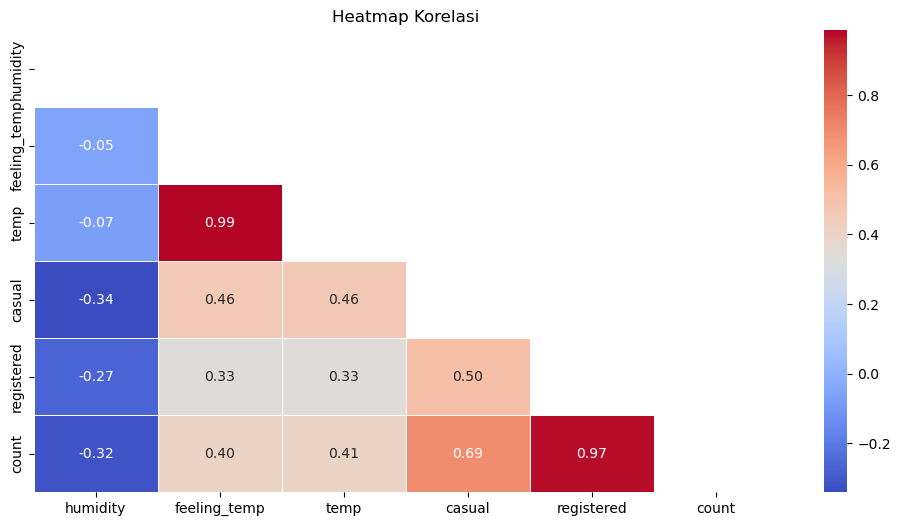

In [18]:
# Hitung korelasi
correlation_matrix = num_features.corr()
up_triangle = np.triu(num_features.corr())

# Plot heatmap korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True,mask=up_triangle, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Based on the correlation analysis, a strong linear relationship was found between the variables `casual` and `registered` and the target variable `count`. This finding is consistent with the variable definitions, where `count` is an aggregation of `casual` and `registered`. To avoid multicollinearity issues and improve model efficiency, it is recommended to eliminate one or both of these independent variables.
Additionally, variables `temp` and `feeling_temp` exhibit a very high correlation, indicating that these two variables measure similar phenomena. To avoid data redundancy, one of the variables can be removed.
Further analysis reveals a positive relationship between `temp` and `count`, as well as a negative relationship between `humidity` and `count`. These findings suggest that higher temperatures tend to be associated with an increase in the number of users, while higher humidity tends to be associated with a decrease in the number of users.

## **Section 6. Data Preparation**

Based on the results of the exploratory data analysis, certain features were identified for removal to improve the performance of the regression model:

- `temp` and `feeling_temp` Variables:
Both variables show a positive correlation with the target variable, count. However, they appear to be nearly identical, potentially causing redundancy. The variable `temp` was selected for retention as it represents temperature in a more general and comprehensible manner.

- `casual` and `registered` Variables:
These variables have a direct correlation with the target variable, count, which may lead to multicollinearity issues. Therefore, they are recommended for removal.

- `Season` and `month` Variable:
Due to the strong correlation between months and seasons, the 'month' variable was chosen as the representative for the season variable.

Based on the analysis in EDA, the following preprocessing tasks will be applied to prepare the dataset for further analysis or modeling.

**Encoding**
- One-Hot Encoding: 
A method to convert categorical features into numerical representations by creating a new column for each category. Each row will be assigned a value of 1 in the column corresponding to its category and 0 in other columns.
    * `month`
    * `hour`
    * `day`
    * `date`
    * `weather`
    * `year`

- Cyclical Encoding:
This method converts cyclical categorical features (e.g., month, day of the week) into sinusoidal numerical representations, allowing the model to more easily capture seasonal or cyclical patterns in the data.
    * `month`
    * `hour`
    * `day`
    * `date`

**Scaling**
- RobustScaler: 
A normalization technique that is more resistant to outliers compared to other normalization techniques such as StandardScaler. RobustScaler calculates quartile statistics to determine the data range and performs scaling based on these quartiles.
    * `month`
    * `hour`
    * `day`
    * `date`
    * `year`


**KBinsDiscretizer**

A method to divide numerical data into several intervals (bins) of equal width or with an equal number of data points in each interval. The numerical feature is then replaced with the corresponding interval label. This method is useful for handling numerical data with non-normal distributions and improving the performance of decision tree-based models.
* `temp`
* `humidity`

### **6.1 Initialization**

In [19]:
import numpy as np
import pandas as pd


class CyclicFeatureTransformer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to encode cyclic features (e.g., hour, month, date)
    into sine and cosine components.
    """

    def __init__(self, variables=None, max_values=None, drop_original=True):
        """
        Parameters:
        - variables: List of features to transform.
        - max_values: Dict with maximum values for each variable (e.g., {'hour': 24, 'month': 12}).
        - drop_original: If True, drop original columns after transformation.
        """
        self.variables = variables
        self.max_values = max_values
        self.drop_original = drop_original
        self.feature_names_out_ = None

    def fit(self, X, y=None):
        """Fit the transformer (nothing to learn here)."""
        if not self.variables or not self.max_values:
            raise ValueError("Both `variables` and `max_values` must be provided.")
        
        self.feature_names_out_ = []
        for var in self.variables:
            self.feature_names_out_.extend([f"{var}_sin", f"{var}_cos"])
        
        return self

    def transform(self, X):
        """Transform the data by adding sine and cosine of cyclic features."""
        X = X.copy()

        for var in self.variables:
            max_val = self.max_values[var]
            X[f"{var}_sin"] = np.sin(2 * np.pi * X[var] / max_val)
            X[f"{var}_cos"] = np.cos(2 * np.pi * X[var] / max_val)

        if self.drop_original:
            X.drop(columns=self.variables, inplace=True)

        return X

    def get_feature_names_out(self, input_features=None):
        """
        Return the names of the features after transformation.
        """
        if self.feature_names_out_ is None:
            raise ValueError("Transformer has not been fitted yet.")
        return self.feature_names_out_


In [88]:
#training data
X_train= df_train.drop(['count'],axis=1)
y_train = df_train['count']

#test data
X_test= df_test.drop(['count'],axis=1)
y_test = df_test['count']

In [89]:
#training data
print("training data feature shape: ",X_train.shape)
print("training data target shape: ",y_train.shape)

#test data
print("test data feature shape: ",X_test.shape)
print("test data target shape: ",y_test.shape)

training data feature shape:  (7785, 14)
training data target shape:  (7785,)
test data feature shape:  (1947, 14)
test data target shape:  (1947,)


### **6.2 Data Transformation (Feature Engineering)**

In this project, two types of transformer architectures will be utilized.
1. *transformer*, a standard transformer without cyclical encoding. 
1. *transformer_cyc*, a modified transformer incorporating cyclical encoding to capture cyclical patterns within the data

In [22]:
cyclical_transformer = Pipeline([
    ('cyclical_features', CyclicFeatureTransformer(
        variables=['hour','month','date', 'day'],
        max_values={'hour': 24,'month': 12,'date': 31, 'day':7}, 
        drop_original=True  
    )),
    ('rob', RobustScaler()) 
])

ohe_robust = Pipeline([
    ('ohe', OneHotEncoder(drop='first')),
    ('robscale', RobustScaler(with_centering=False))
]) 

In [90]:
transformer_cyc = ColumnTransformer(
    transformers=[
        ("Hum, Temp,", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["humidity", "temp"]),
        ('or', cyclical_transformer, ['month','hour','date','day']),
        ('ohe',OneHotEncoder(drop='first'),['weather']),
        ('year', RobustScaler(),['year']), # Encoding kategorikal
        ('drop','drop',['registered','casual','feeling_temp','season']) # Unused Feature. Drop!
    ],
    remainder='passthrough', verbose_feature_names_out=False
)

transformer = ColumnTransformer(
    transformers=[
        ("Hum, Temp,", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["humidity", "temp"]),
        ('ohe', ohe_robust, ['month','weather','hour','day','date','year']),
        ('drop','drop',['registered','casual','feeling_temp','season']) # Unused Feature. Drop!
    ],
    remainder='passthrough', verbose_feature_names_out=False
)


In [91]:
# Standard Transformer
transformer.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Hum, Temp,',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['humidity', 'temp']),
                                ('ohe',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first')),
                                                 ('robscale',
                                                  RobustScaler(with_centering=False))]),
                                 ['month', 'weather', 'hour', 'day', 'date',
                                  'year']),
                                ('drop', 'drop',
                                 ['registered', 'casual', 'feeling_temp',
                                  'season'])],
                  verbose_feature_names_out=False)

In [92]:
# Transformer with Cyclic
transformer_cyc.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Hum, Temp,',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['humidity', 'temp']),
                                ('or',
                                 Pipeline(steps=[('cyclical_features',
                                                  CyclicFeatureTransformer(max_values={'date': 31,
                                                                                       'day': 7,
                                                                                       'hour': 24,
                                                                                       'month': 12},
                                                                           variables=['hour',
                                                                                      'month',
                                                                                      'date',
                                                                                      'day'])),
                                                 ('rob', RobustScaler())]),
                                 ['month', 'hour', 'date', 'day']),
                                ('ohe', OneHotEncoder(drop='first'),
                                 ['weather']),
                                ('year', RobustScaler(), ['year']),
                                ('drop', 'drop',
                                 ['registered', 'casual', 'feeling_temp',
                                  'season'])],
                  verbose_feature_names_out=False)

### **6.3 Overview**

#### **Dataset Post-Transformation Size**

**Standard Transformer**

In [108]:
## Overview result after transformation

X_train_pre1 = transformer.transform(X_train).toarray()
X_test_pre1 = transformer.transform(X_test).toarray()

# DataFrame
X_train_pre1 = pd.DataFrame(X_train_pre1, columns=transformer.get_feature_names_out())
X_test_pre1 = pd.DataFrame(X_test_pre1, columns=transformer.get_feature_names_out())

display(X_train_pre1.head(), X_test_pre1.head())

,humidity,temp,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,date_25,date_26,date_27,date_28,date_29,date_30,date_31,year_2012,holiday,is_weekend
0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,humidity,temp,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,date_25,date_26,date_27,date_28,date_29,date_30,date_31,year_2012,holiday,is_weekend
0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Transformer with Cyclical Encoding**

In [94]:
## Overview result after transformation
X_train_pre_cyc = transformer_cyc.transform(X_train)
X_test_pre_cyc = transformer_cyc.transform(X_test)

# DataFrame
X_train_pre_cyc = pd.DataFrame(X_train_pre_cyc, columns=transformer_cyc.get_feature_names_out())
X_test_pre_cyc = pd.DataFrame(X_test_pre_cyc, columns=transformer_cyc.get_feature_names_out())

display(X_train_pre_cyc.head(), X_test_pre_cyc.head())

,humidity,temp,hour_sin,hour_cos,month_sin,month_cos,date_sin,date_cos,day_sin,day_cos,weather_2,weather_3,weather_4,year,holiday,is_weekend
0,1.0,4.0,-0.183013,-0.683013,-0.866025,-0.366025,-0.206516,-6.240757e-01,-0.277479,-0.445042,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,0.000000,0.707107,-1.000000,0.000000,-0.545518,-3.878201e-01,0.277479,-0.445042,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,3.0,-0.612372,0.353553,0.000000,-0.732051,-0.667830,-1.381501e-01,-0.277479,-0.445042,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,0.612372,-0.353553,0.866025,0.366025,-0.688967,-6.278783e-16,0.277479,-0.445042,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,0.683013,0.183013,-0.500000,-0.633975,0.206516,-6.240757e-01,0.277479,-0.445042,0.0,0.0,0.0,-1.0,0.0,0.0


,humidity,temp,hour_sin,hour_cos,month_sin,month_cos,date_sin,date_cos,day_sin,day_cos,weather_2,weather_3,weather_4,year,holiday,is_weekend
0,2.0,0.0,3.535534e-01,0.612372,8.660254e-01,0.366025,0.449351,-0.489118,-0.500000,0.554958,1.0,0.0,0.0,0.0,0.0,1.0
1,3.0,1.0,-3.535534e-01,0.612372,-3.673940e-16,0.732051,0.206516,-0.624076,0.623490,0.000000,0.0,0.0,0.0,-1.0,0.0,0.0
2,2.0,3.0,8.659561e-17,-0.707107,-5.000000e-01,-0.633975,-0.272047,0.669745,-0.500000,0.554958,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,3.535534e-01,-0.612372,-3.673940e-16,0.732051,0.272047,0.669745,-0.500000,0.554958,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1.0,-1.830127e-01,-0.683013,8.660254e-01,-0.366025,0.688967,0.000000,-0.277479,-0.445042,0.0,1.0,0.0,-1.0,0.0,0.0


**Multicollinearity Check Using VIF**

The Variance Inflation Factor (VIF) is a commonly used diagnostic tool to detect multicollinearity among predictor variables. VIF measures how much the variance of a regression coefficient is inflated due to collinearity with other predictors.

**Calculating VIF:**

VIF is computed for each independent variable in the model. A higher VIF value indicates a stronger influence of other variables on the variance of the coefficient of that particular variable.

**Interpreting VIF Values:**

VIF < 5: Generally, no serious multicollinearity is present.<br>
5 ≤ VIF < 10: Moderate multicollinearity may be present, warranting further investigation.<br>
VIF ≥ 10: Severe multicollinearity is indicated, and remedial measures should be taken.<br>

In [106]:
const_ = add_constant(X_train_pre1)

vif_data = pd.DataFrame()
vif_data['Variable'] = const_.columns  # Nama variabel
vif_data['VIF'] = [variance_inflation_factor(const_.values, i) for i in range(const_.shape[1])]

# show values of VIF
print(vif_data)

      Variable        VIF
0        const  86.471514
1     humidity   1.740126
2         temp   4.033400
3      month_2   1.841533
4      month_3   2.069829
..         ...        ...
74     date_30   1.831273
75     date_31   1.616722
76   year_2012   1.023764
77     holiday   1.158780
78  is_weekend        inf

[79 rows x 2 columns]


In [97]:
const_ = add_constant(X_train_pre_cyc)

vif_data = pd.DataFrame()
vif_data['Variable'] = const_.columns  # Nama variabel
vif_data['VIF'] = [variance_inflation_factor(const_.values, i) for i in range(const_.shape[1])]

# show values of VIF
print(vif_data)

      Variable        VIF
0        const  27.836842
1     humidity   1.620134
2         temp   3.822659
3     hour_sin   1.294887
4     hour_cos   1.177439
5    month_sin   1.772301
6    month_cos   2.926068
7     date_sin   1.013299
8     date_cos   1.002947
9      day_sin   2.849751
10     day_cos   1.145687
11   weather_2   1.158011
12   weather_3   1.239657
13   weather_4   1.003309
14        year   1.017999
15     holiday   1.077308
16  is_weekend   2.996149


Based on the multicollinearity test using the Variance Inflation Factor (VIF), no significant multicollinearity was detected in the transformed data. This is indicated by the VIF values of all independent variables being below the threshold of 5.

## **Section 7. Model Development**

### **7.1 Initialization**

- **Workflow of the experiment**

In [30]:
# # Load and display an image
# plt.figure(figsize=(20, 10))
# img = mpimg.imread(r'D:\Data Science\Capstone Project\Capstone Project 3\bike_sharing\assets\WorkFlow.drawio.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

- **Initialization Metrics**

In [31]:
scoring = {
    'rmse': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

- **Initialization Function**

In [32]:
def evaluate_models(models_log, transformer, X_train, y_train, scoring):
    """
    Evaluate multiple models using cross-validation and return performance metrics as a DataFrame.

    Parameters:
    - models_log (list): List of model objects to evaluate.
    - transformer: Preprocessing pipeline or transformer object.
    - X_train: Training features.
    - y_train: Training target.
    - scoring (dict): Dictionary of scoring metrics for cross-validation.

    Returns:
    - pd.DataFrame: DataFrame containing mean and std of scores for each metric.
    """
    results = {
        "Model": [],
        "Mean_RMSE": [], "Std_RMSE": [],
        "Mean_MAE": [], "Std_MAE": [],
        "Mean_MAPE": [], "Std_MAPE": [],
        "Mean_R2": [], "Std_R2": []
    }

    for model in models_log:
        model_name = type(model.regressor).__name__  # Nama model dari regressor asli
            
        results["Model"].append(model_name)

        pipe_model = Pipeline([
            ("preprocess", transformer),
            ("model", model)
        ])

        cv = KFold(n_splits=5, shuffle=True, random_state=19)

        cv_score = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=cv,
            scoring=scoring,
            error_score="raise"
        )

        results["Mean_RMSE"].append(cv_score["test_rmse"].mean())
        results["Std_RMSE"].append(cv_score["test_rmse"].std())

        results["Mean_MAE"].append(cv_score["test_mae"].mean())
        results["Std_MAE"].append(cv_score["test_mae"].std())

        results["Mean_MAPE"].append(cv_score["test_mape"].mean())
        results["Std_MAPE"].append(cv_score["test_mape"].std())

        results["Mean_R2"].append(cv_score["test_R2"].mean())
        results["Std_R2"].append(cv_score["test_R2"].std())

    return pd.DataFrame(results).sort_values("Mean_R2", ascending=False)

### **7.3 Model Benchmarking (Comparing model base performance)**

To ensure a fair comparison among the various developed models, each model was integrated into a *TransformedTargetRegressor*. This step was taken to address the issue of non-normal distribution in the target variable, thereby enhancing the reliability of model evaluation results

In [33]:
linear = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
ridge = TransformedTargetRegressor(Ridge(random_state=42), func=np.log, inverse_func=np.exp)
lasso = TransformedTargetRegressor(Lasso(random_state=42), func=np.log, inverse_func=np.exp)
tree = TransformedTargetRegressor(DecisionTreeRegressor(random_state=42), func=np.log, inverse_func=np.exp)
forest = TransformedTargetRegressor(RandomForestRegressor(random_state=42), func=np.log, inverse_func=np.exp)
gboost = TransformedTargetRegressor(GradientBoostingRegressor(random_state=42), func=np.log, inverse_func=np.exp)
xgb = TransformedTargetRegressor(XGBRegressor(random_state=42, categorical_enable=True), func=np.log, inverse_func=np.exp)

models_log = [linear, ridge, lasso, tree, forest, gboost, xgb]

- **Evaluate_Models with parameter transformer**

In [34]:
results1 = evaluate_models(models_log, transformer, X_train, y_train, scoring)

In [35]:
results1

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
6,XGBRegressor,-60.335557,2.247829,-37.848562,1.150753,-0.371932,0.018504,0.887460,0.009030
4,RandomForestRegressor,-70.984530,2.983879,-43.914410,1.438450,-0.463708,0.020273,0.844037,0.015082
3,DecisionTreeRegressor,-89.761185,5.126038,-52.928324,2.592433,-0.598809,0.050837,0.750270,0.031621
0,LinearRegression,-98.889391,1.106751,-64.739764,0.484689,-0.621771,0.042972,0.698225,0.004025
1,Ridge,-99.184069,1.155190,-64.826998,0.528664,-0.623482,0.043339,0.696429,0.003873
5,GradientBoostingRegressor,-101.221438,1.358645,-64.450629,0.527556,-0.621644,0.045629,0.683649,0.011741
2,Lasso,-204.186146,2.292213,-143.186673,1.434913,-3.817563,0.410797,-0.286560,0.015879


- **Evaluate_Models with parameter transformer_cyc**

In [36]:
results2 = evaluate_models(models_log, transformer_cyc, X_train, y_train, scoring)

In [37]:
results2

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
6,XGBRegressor,-46.015140,1.472854,-27.250398,1.047131,-0.257026,0.009886,0.934538,0.005037
4,RandomForestRegressor,-50.822167,2.114200,-30.486516,1.185657,-0.301605,0.014718,0.920059,0.007838
3,DecisionTreeRegressor,-68.891248,1.291155,-40.418497,1.139796,-0.411344,0.026410,0.853394,0.007609
5,GradientBoostingRegressor,-70.457633,2.059291,-44.435108,1.211447,-0.391023,0.022647,0.846561,0.010888
1,Ridge,-156.777727,2.654933,-101.618918,1.225491,-1.049678,0.049054,0.241404,0.021244
0,LinearRegression,-156.873069,2.651971,-101.666020,1.224146,-1.049403,0.048976,0.240481,0.021261
2,Lasso,-204.186146,2.292213,-143.186673,1.434913,-3.817563,0.410797,-0.286560,0.015879


- **Model Comparison**

In [38]:
compare_model = pd.DataFrame(
    [results1.iloc[0], results2.iloc[0]],
    index=['Model 1', 'Model 2']
)

compare_model.columns = results1.columns  # Menyamakan kolom
compare_model = compare_model.sort_values(by='Mean_R2', ascending=False)

In [39]:
compare_model

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
Model 2,XGBRegressor,-46.015140,1.472854,-27.250398,1.047131,-0.257026,0.009886,0.934538,0.005037
Model 1,XGBRegressor,-60.335557,2.247829,-37.848562,1.150753,-0.371932,0.018504,0.887460,0.009030


Based on the performance comparison of the 2 models, Model 2 (with Cyclical Encoding) performs better than Model 1 (with standard encoding) on all evaluation metrics.

- **Predict To Test Data Before Tuning**

In [80]:
scoring = {
    'rmse': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

best_model_name = "XGB"
best_model = xgb

scores = {"RMSE": [], "MAE": [], "MAPE": [], "R2": []}

pipeline = Pipeline([
    ('preprocessing', transformer_cyc),
    ('model', best_model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

scores["RMSE"].append(rmse(y_test, y_pred))
scores["MAE"].append(mean_absolute_error(y_test, y_pred))
scores["MAPE"].append(mean_absolute_percentage_error(y_test, y_pred))
scores['R2'].append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame(scores, index=[best_model_name])
score_before_tuning


,RMSE,MAE,MAPE,R2
XGB,44.713541,27.119405,0.235238,0.945233


**Model with cyclical Encoding performs better on the testing data** than it did on the training data (cross-validation). This indicates the model is not overfitting and generalizes well to new, unseen data. The lower RMSE, MAE, and MAPE, coupled with a higher R², confirm its robustness and effectiveness.

### **7.4 Tune Model**

XGBOOST

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm based on gradient boosting. It is widely used for supervised learning tasks such as regression, classification, and ranking due to its high performance and flexibility.

XGBOOST Parameter :

**max_depth**: Maximum depth of the trees. Controls how complex each tree can be. Larger values make the model more complex but can lead to overfitting.<br>
**learning_rate**: Step size for updating weights. Smaller values make training slower but can improve generalization.<br>
**n_estimators**: Number of trees (boosting rounds). More trees can improve accuracy but increase training time.<br>
**subsample**: Proportion of training data used to grow each tree. Helps prevent overfitting.<br>
**gamma**: Minimum loss reduction required to split a node.Larger values make the model more conservative.<br>
**colsample_bytree**: Fraction of features used to build each tree. Controls feature sampling.<br>
**reg_alpha**: L1 regularization term. Regularizes the model by adding a penalty term for the absolute value of the coefficients.<br>

#### **7.4.1 First Tuning**

In [98]:
from sklearn.model_selection import GridSearchCV

pipe_model = Pipeline([
        ("preprocessing", transformer_cyc),
        ("modeling", best_model)
    ])

hyperparm = {
    "modeling__regressor__max_depth": [3,5,7],
    "modeling__regressor__learning_rate":  [0.1,0.5,0.9],
    "modeling__regressor__n_estimators": [100, 250, 500],
    "modeling__regressor__subsample":  [0.1,0.5,0.9],
    "modeling__regressor__gamma": [0,5,10],
    "modeling__regressor__colsample_bytree": [0.1,0.5,0.9],
    "modeling__regressor__reg_alpha": [0.01,0.1,1]
}
 
cv = KFold(n_splits=5, shuffle=True, random_state=42)

tuning1 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparm,
    scoring=scoring,
    refit="rmse",
    cv=cv,
    return_train_score=True,
    verbose=1
)

# tuning1.fit(X_train, y_train)

In [99]:
tuning1.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Hum, '
                                                                         'Temp,',
                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                          strategy='uniform'),
                                                                         ['humidity',
                                                                          'temp']),
                                                                        ('or',
                                                                         Pipeline(steps=[('cyclical_features',
                                                                                          CyclicFeatureTransformer(max_values={'date': 31,
                                                                                                                               'day': 7,...
             scoring={'R2': make_scorer(r2_score, response_method='predict'),
                      'mae': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict', squared=False)},
             verbose=1)

In [109]:
tuning1.best_params_

{'modeling__regressor__colsample_bytree': 0.9,
 'modeling__regressor__gamma': 0,
 'modeling__regressor__learning_rate': 0.1,
 'modeling__regressor__max_depth': 7,
 'modeling__regressor__n_estimators': 500,
 'modeling__regressor__reg_alpha': 1,
 'modeling__regressor__subsample': 0.9}

In [110]:
tuning1.best_score_

np.float64(-43.059540940397866)

#### **7.4.2 Second Tuning**

In [112]:
hyperparam_tuning2 = {
    "modeling__regressor__max_depth": [6, 7, 8],  # Nilai sekitar hasil terbaik (7)
    "modeling__regressor__learning_rate": [0.05, 0.1, 0.15],  # Fokus di sekitar 0.1
    "modeling__regressor__n_estimators": [400, 500, 600],  # Fokus di sekitar 500
    "modeling__regressor__subsample": [0.8, 0.9, 1.0],  # Sekitar 0.9
    "modeling__regressor__gamma": [0, 1, 2],  # Sedikit menaikkan nilai dari 0
    "modeling__regressor__colsample_bytree": [0.8, 0.9, 1.0],  # Fokus di sekitar 0.9
    "modeling__regressor__reg_alpha": [0.5, 1, 1.5],  # Fokus di sekitar 1
}

tuning2 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_tuning2,
    scoring=scoring,
    refit="rmse",
    cv=cv,
    return_train_score=True,
    verbose=1
)

tuning2.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Hum, '
                                                                         'Temp,',
                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                          strategy='uniform'),
                                                                         ['humidity',
                                                                          'temp']),
                                                                        ('or',
                                                                         Pipeline(steps=[('cyclical_features',
                                                                                          CyclicFeatureTransformer(max_values={'date': 31,
                                                                                                                               'day': 7,...
             scoring={'R2': make_scorer(r2_score, response_method='predict'),
                      'mae': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'rmse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict', squared=False)},
             verbose=1)

In [113]:
tuning2.best_params_

{'modeling__regressor__colsample_bytree': 1.0,
 'modeling__regressor__gamma': 0,
 'modeling__regressor__learning_rate': 0.05,
 'modeling__regressor__max_depth': 6,
 'modeling__regressor__n_estimators': 600,
 'modeling__regressor__reg_alpha': 0.5,
 'modeling__regressor__subsample': 0.8}

In [114]:
tuning2.best_score_

np.float64(-41.3425262746866)

In [115]:
pd.DataFrame({
    'Before Tuning': score_before_tuning.iloc[0,0],
    'First Tuning':-tuning1.best_score_,
    'Second Tuning':-tuning2.best_score_
},index=['Best Score']).T

,Best Score
Before Tuning,44.713541
First Tuning,43.059541
Second Tuning,41.342526


The results of hyperparameter tuning using the RMSE evaluation metric show an improvement in model performance in the second iteration. The best score increased by 3 points compared to the initial model.

### **7.5 Analyze Model**

#### **7.5.1 Evaluate model on data testing**

In [116]:
best_model = {'XGB2':xgb}
# Define model with the best estimator
xgb_tuning2 = tuning2.best_estimator_

# Fitting model
xgb_tuning2.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning2 = xgb_tuning2.predict(X_test)

# Save the metrics after tunning
rmse_score = rmse(y_test, y_pred_xgb_tuning2)
mae_score = mean_absolute_error(y_test, y_pred_xgb_tuning2)
mape_score = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning2)
r2 = r2_score(y_test, y_pred_xgb_tuning2)

score_after_tuning_2 = pd.DataFrame(
    {
    "RMSE": rmse_score, 
    "MAE": mae_score, 
    "MAPE": mape_score,
    'R2':r2,
    },
    index=best_model.keys()
)

score_after_tuning_2

,RMSE,MAE,MAPE,R2
XGB2,40.866957,25.182315,0.218372,0.95425


In [117]:
pd.concat([
    score_before_tuning, score_after_tuning_2
]).reset_index(drop=True).rename(index={0:'Before Tuning',1:'After Tuning'})

,RMSE,MAE,MAPE,R2
Before Tuning,44.713541,27.119405,0.235238,0.945233
After Tuning,40.866957,25.182315,0.218372,0.954250


After hyperparameter tuning, the model's RMSE and MAE have decreased, indicating that the predictions are more accurate. The reduction in RMSE from 44.71 to 40.87 shows an improvement in the model's ability to minimize prediction errors, while the decrease in MAE from 27.12 to 25.18 reflects more precise absolute error values.

Additionally, the MAPE has decreased from 0.235 to 0.218, signifying an improvement in the model's ability to make percentage-based error predictions.

Overall, the hyperparameter tuning successfully enhanced the model's accuracy and predictive performance across all metrics.

#### **7.5.2 Residual Analysis**

**Residual Plot**

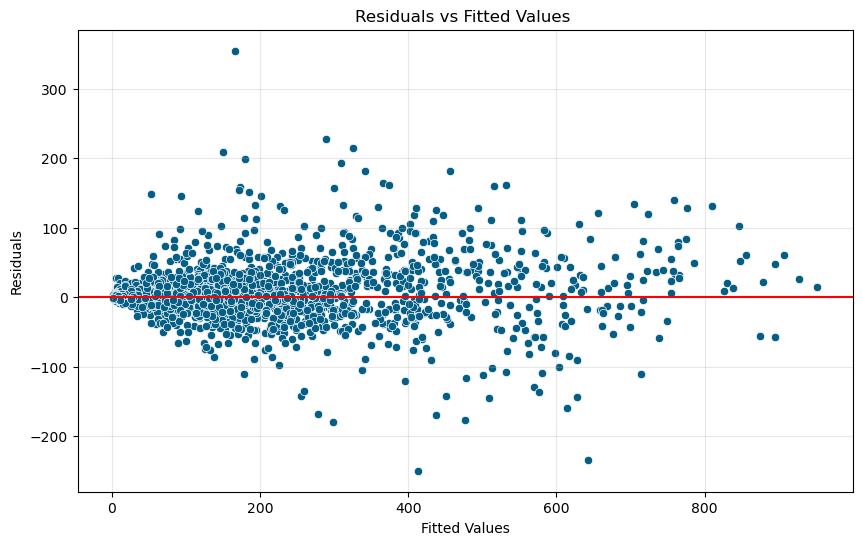

In [118]:
residuals = y_test - y_pred_xgb_tuning2

# Create a scatter plot of residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb_tuning2, y=residuals, color='#055E85')
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values ')
plt.grid(True, alpha=0.3)
plt.show()

**Distribution of Residuals**

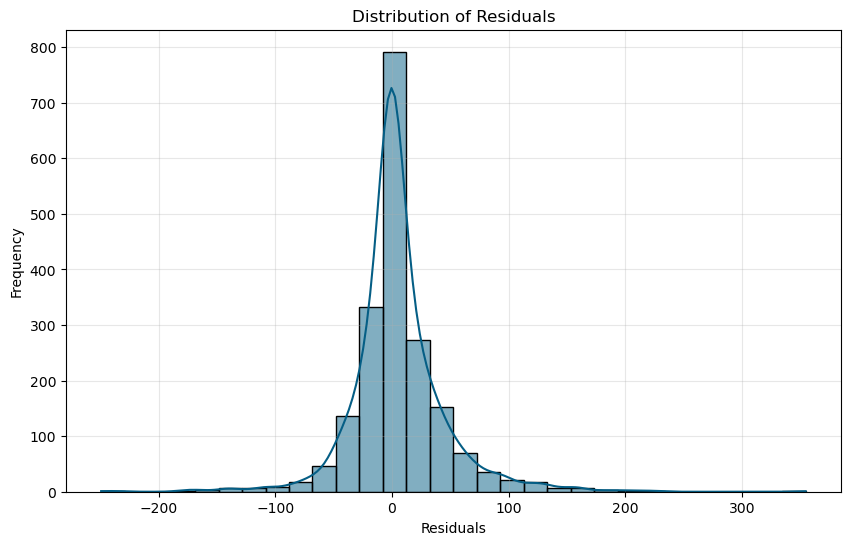

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='#055E85')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

**Insight**

**1. Residual Distribution:**<br>
The residuals are randomly scattered around the horizontal zero line, indicating that the model generally does not exhibit systematic bias in its predictions.
However, there are some extreme residuals (outliers) far from zero, suggesting that the model struggles to predict certain instances accurately.

**2. Homoscedasticity (Uniform Residual Variance):**<br>
The spread of residuals appears to increase as the fitted values grow, which indicates heteroscedasticity. This means the model's prediction errors are not uniform across all ranges of the fitted values. This could suggest that the model's performance is less accurate for higher predicted values.

**3. Model Fit Quality:**<br>
While the overall random scatter shows that the model captures the general trend in the data, the presence of outliers and heteroscedasticity indicates areas for improvement.

**Actual Vs Predicted Price**

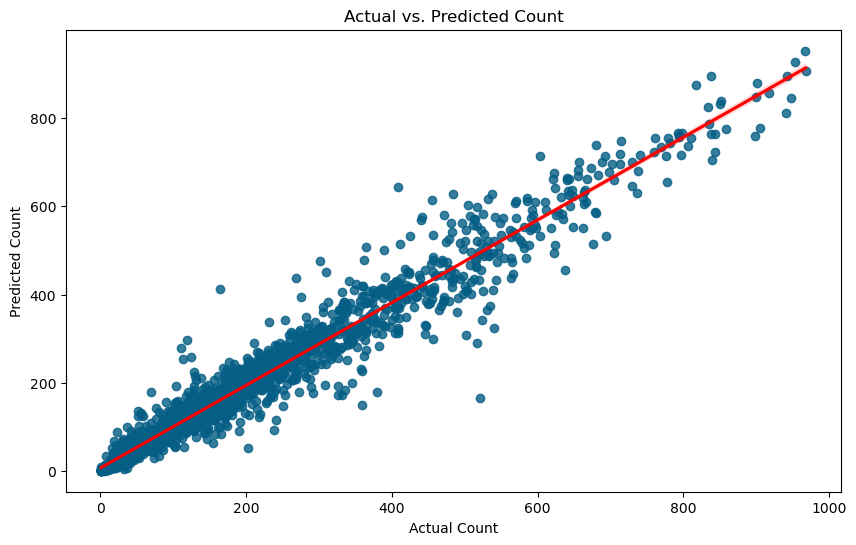

In [70]:
plt.figure(figsize=(10, 6))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning2, color="#055E85",line_kws={"color": "red"}).set(title="Actual vs. Predicted Count", 
                                               xlabel="Actual Count", 
                                               ylabel="Predicted Count")

**Insight**

1. Strong Model Fit:<br>
The points are well-aligned with the diagonal red line, indicating that the model predicts values close to the actual values for most instances. This demonstrates a strong correlation between the actual and predicted counts.

1. High Accuracy for Lower Values:<br>
The clustering of points near the line for lower values suggests that the model performs very well in predicting small-to-moderate counts, with minimal errors in this range.

1. Slight Deviation for Higher Values:<br>
At higher actual counts, the scatter widens slightly, indicating increased prediction errors. This suggests the model's performance might degrade as the actual count increases.

1. Balanced Predictions:<br>
The points are evenly distributed above and below the red line, showing that the model does not have a systematic tendency to overpredict or underpredict across the dataset.

1. Outliers:<br>
A few points deviate significantly from the line, especially at higher actual counts. These outliers might represent instances where the model struggles or cases with anomalies in the data.

### **7.6 Model Explanation and Interpretation**

#### **7.6.1 Feature Importance**

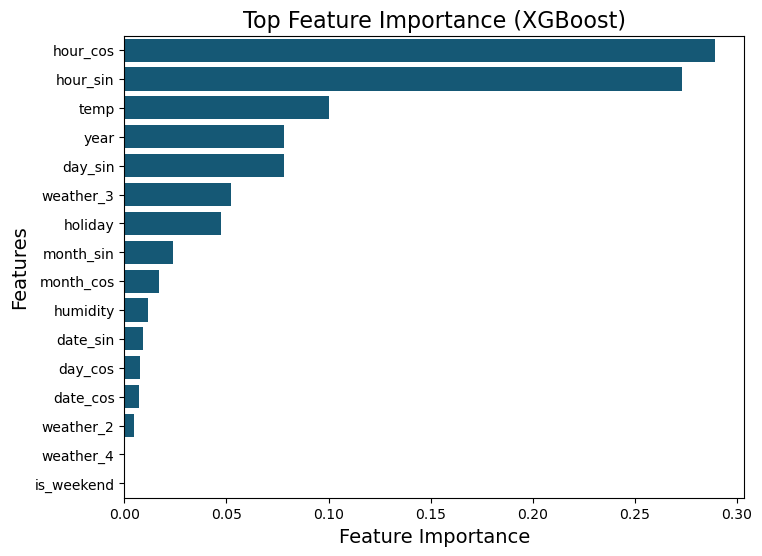

In [77]:
xgb_model = tuning2.best_estimator_.named_steps['modeling']
xgb_model = xgb_model.regressor_ if hasattr(xgb_model, 'regressor_') else xgb_model

feature_importances = xgb_model.feature_importances_
feature_names = transformer_cyc.get_feature_names_out()

# Buat DataFrame dan visualisasi
feature_imp = pd.DataFrame({
    "Features": feature_names,
    "Value": feature_importances
}).sort_values("Value", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_imp, x="Value", y="Features", color='#055E85')
plt.title("Top Feature Importance (XGBoost)", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()


**Dominant Features:**<br>
The features hour_cos and hour_sin have the highest importance, indicating that time-related cyclic patterns (hours in a day) strongly influence the target variable.
These are significantly more important than other features, suggesting that the target variable varies greatly depending on the time of day.

**Less Important Features:**<br>
Features such as is_weekend, weather_4, and weather_2 have negligible importance, implying they contribute little to the predictive performance of the model.

**Feature Representation:**<br>
Trigonometric transformations (e.g., _cos and _sin) of cyclic features (hour, month, day) seem effective, as they rank among the most important features.

#### **7.6.2 Shap Value Identification**

In [78]:
col_names=tuning2.best_estimator_[0].get_feature_names_out()

best_model = tuning2.best_estimator_["modeling"].regressor_

data = pd.DataFrame(tuning2.best_estimator_[0].fit_transform(X_train), columns=col_names)

100%|===================| 7757/7785 [03:43<00:00]        

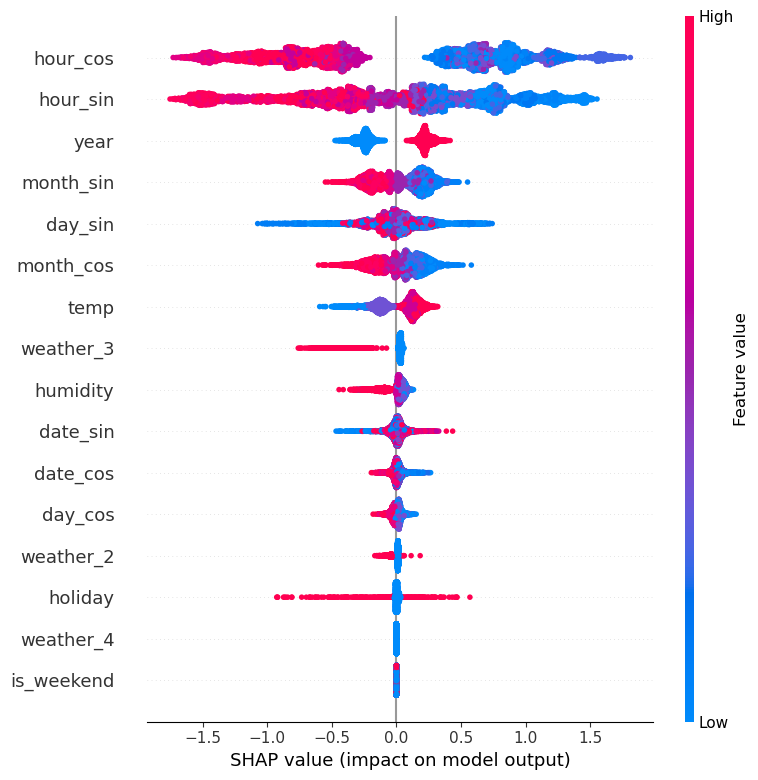

In [79]:
# define explainer
explainer = shap.TreeExplainer(
    best_model,
    data = data  
)

# count shap value for every rows in the train data
shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data, feature_names = feature_names)

**1. Top Influential Features:**<br>
- Similar to the feature importance bar plot, hour_cos, hour_sin, and year are the most influential features affecting the model's predictions. These have wide distributions of SHAP values, indicating their strong and consistent impact.

**2. Impact of Feature Values:**<br>
- Features like hour_cos and hour_sin show clear patterns:
    * High values (in red) and low values (in blue) have distinctly different impacts on the model output.
    * This suggests these features effectively capture cyclic temporal behaviors that significantly affect the target.

**3. Negligible Impact:**<br>
- Features such as is_weekend, weather_2, and weather_4 contribute minimally to the model's output, as indicated by the narrow SHAP value ranges near zero.

## **Section 8. Model Deployment**

In [119]:
filename = 'XGBoost-v1-0.95.sav'
pickle.dump(tuning2, open(filename, 'wb'))

In [120]:
model = pickle.load(open('XGBoost-v1-0.83.sav', 'rb'))
model

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Hum, '
                                                                         'Temp,',
                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                          strategy='uniform'),
                                                                         ['humidity',
                                                                          'temp']),
                                                                        ('or',
                                                                         Pipeline(steps=[('cyclical_features',
                                                                                          CyclicFeatureTransformer(max_values={'date': 31,
                                                                                                                               'day': 7,...
                         'modeling__regressor__max_depth': [6, 7, 8],
                         'modeling__regressor__n_estimators': [400, 500, 600],
                         'modeling__regressor__reg_alpha': [0.5, 1, 1.5],
                         'modeling__regressor__subsample': [0.8, 0.9, 1.0]},
             refit='rmse', return_train_score=True,
             scoring={'mae': 'neg_mean_absolute_error',
                      'mape': 'neg_mean_absolute_percentage_error',
                      'rmse': 'neg_root_mean_squared_error'},
             verbose=1)

In [121]:
X_seen= df_seen.drop(['count'],axis=1)
y_seen = df_seen['count']

print("feature shape: ",X_seen.shape)
print("target shape: ",y_seen.shape)

feature shape:  (9732, 14)
target shape:  (9732,)


In [ ]:
model.fit(X_seen, y_seen)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


## **Section 9. Model Implementation**

#### **9.1 How to implement the model ?**


The bike rental prediction model that has been developed aims to enhance the efficiency and value of bike-sharing systems for both operators and users. With this model, various features can be integrated to predict demand accurately, optimize bike distribution, and analyze rental patterns. The model also enables continuous evaluation and data updates to ensure relevance in dynamic conditions such as weather, urban mobility, and seasonal variations

#### **9.2 What are the limitations of the model ?**

Limitation based on data limitation based on the results obtained

- **Limited Data Coverage:** <br>
The historical data used in this model only covers the years 2011 and 2012. This poses a limitation because bike rental demand patterns may have changed over time due to new trends, transportation policies, or shifts in societal conditions. Consequently, the model may lack relevance when applied to predict patterns in more recent years.

- **Seasonality and External Events:** <br>
While the model can account for regular patterns, unexpected events such as road closures, public events, or sudden weather changes (e.g., storms) may not be captured effectively, leading to inaccurate forecasts.

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)